In [1]:
import pandas as pd # to eda 
import numpy as np # for numerical computation 
import matplotlib.pyplot as plt # visualization 
import seaborn as sns # advance visualization 
from sklearn.cluster import KMeans # model 
from sklearn.metrics import silhouette_score 
from sklearn.preprocessing import MinMaxScaler

In [2]:
# reading iris data set using pandas 
iris_data= pd.read_csv("/home/hdoop/Downloads/archive(1)/IRIS.csv")

In [3]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
x=iris_data.iloc[:,[0,1,2,3]].values
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [5]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


/home/hdoop/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/hdoop/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/hdoop/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/hdoop/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:261

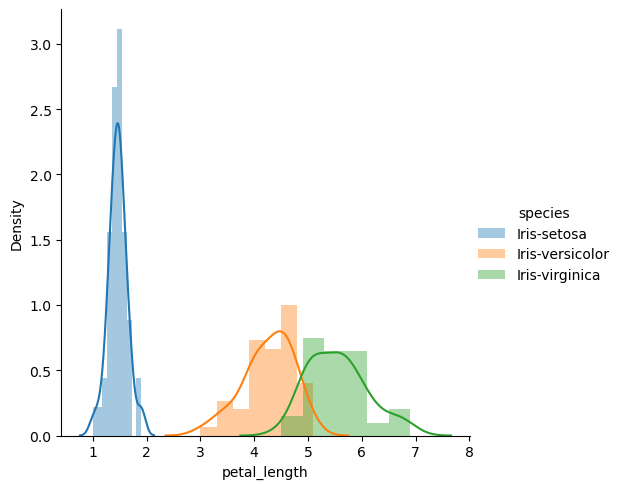

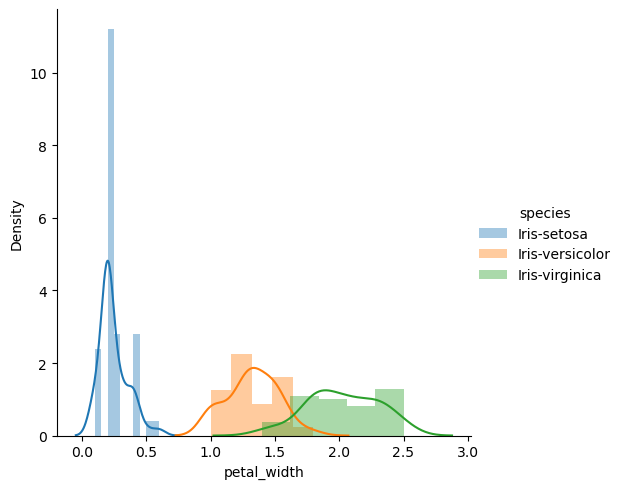

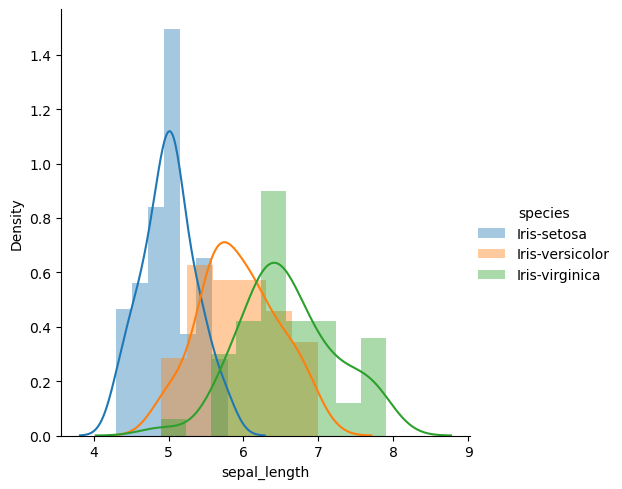

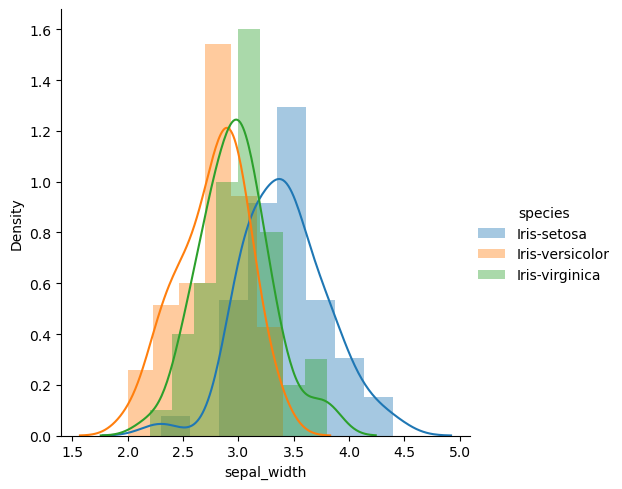

In [6]:
sns.FacetGrid(iris_data,hue='species',size=5).map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(iris_data,hue='species',size=5).map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(iris_data,hue='species',size=5).map(sns.distplot,"sepal_length").add_legend()
sns.FacetGrid(iris_data,hue='species',size=5).map(sns.distplot,"sepal_width").add_legend()
plt.show()

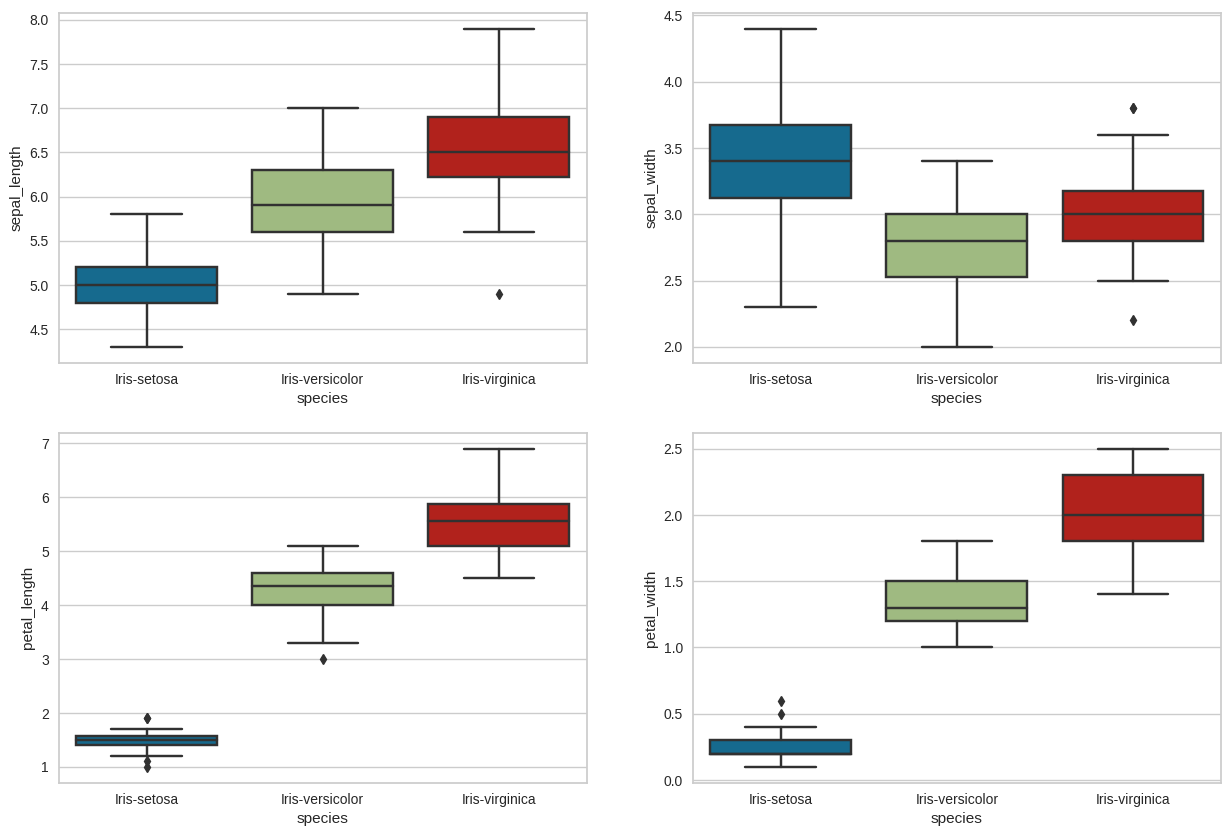

In [32]:
%matplotlib inline
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x="species",y="sepal_length",data=iris_data)
plt.subplot(2,2,2)
sns.boxplot(x="species",y="sepal_width",data=iris_data)
plt.subplot(2,2,3)
sns.boxplot(x="species",y="petal_length",data=iris_data)
plt.subplot(2,2,4)
sns.boxplot(x="species",y="petal_width",data=iris_data)
plt.show()

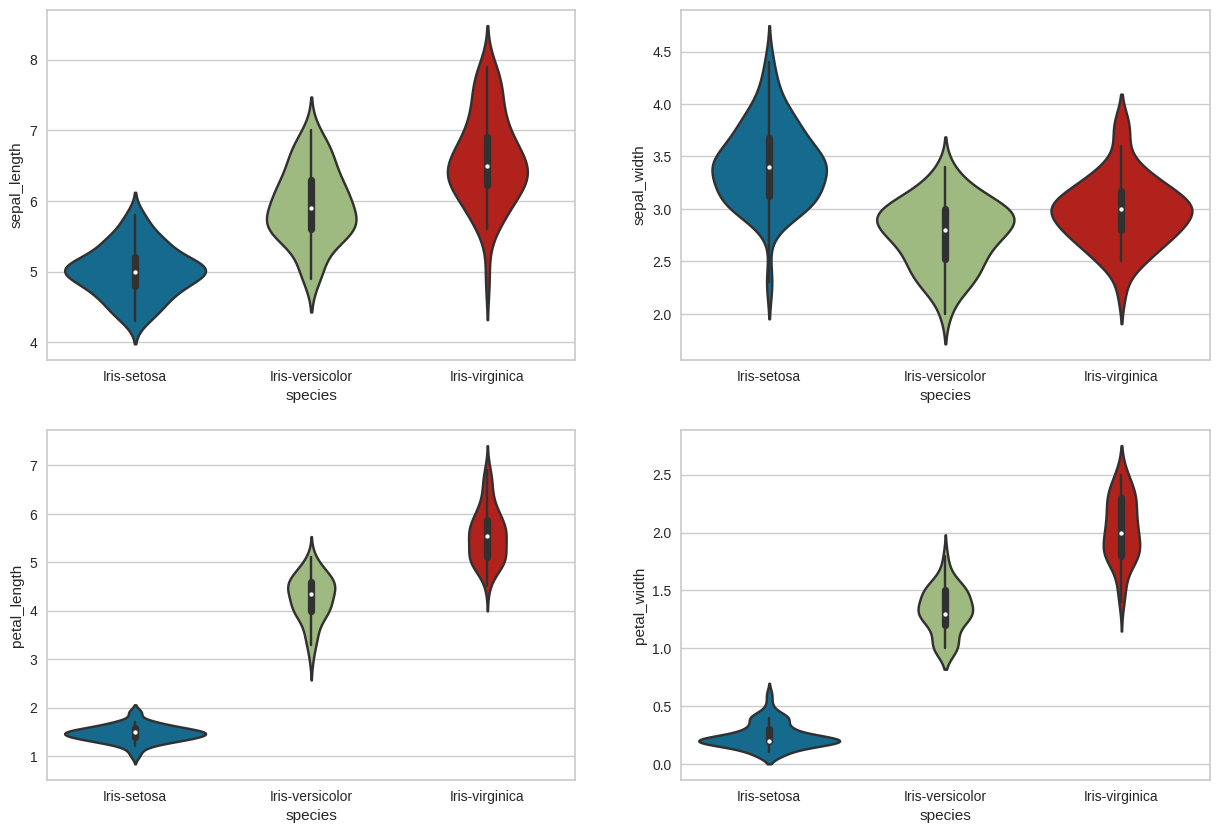

In [31]:
%matplotlib inline
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x="species",y="sepal_length",data=iris_data)
plt.subplot(2,2,2)
sns.violinplot(x="species",y="sepal_width",data=iris_data)
plt.subplot(2,2,3)
sns.violinplot(x="species",y="petal_length",data=iris_data)
plt.subplot(2,2,4)
sns.violinplot(x="species",y="petal_width",data=iris_data)
plt.show()

/home/hdoop/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


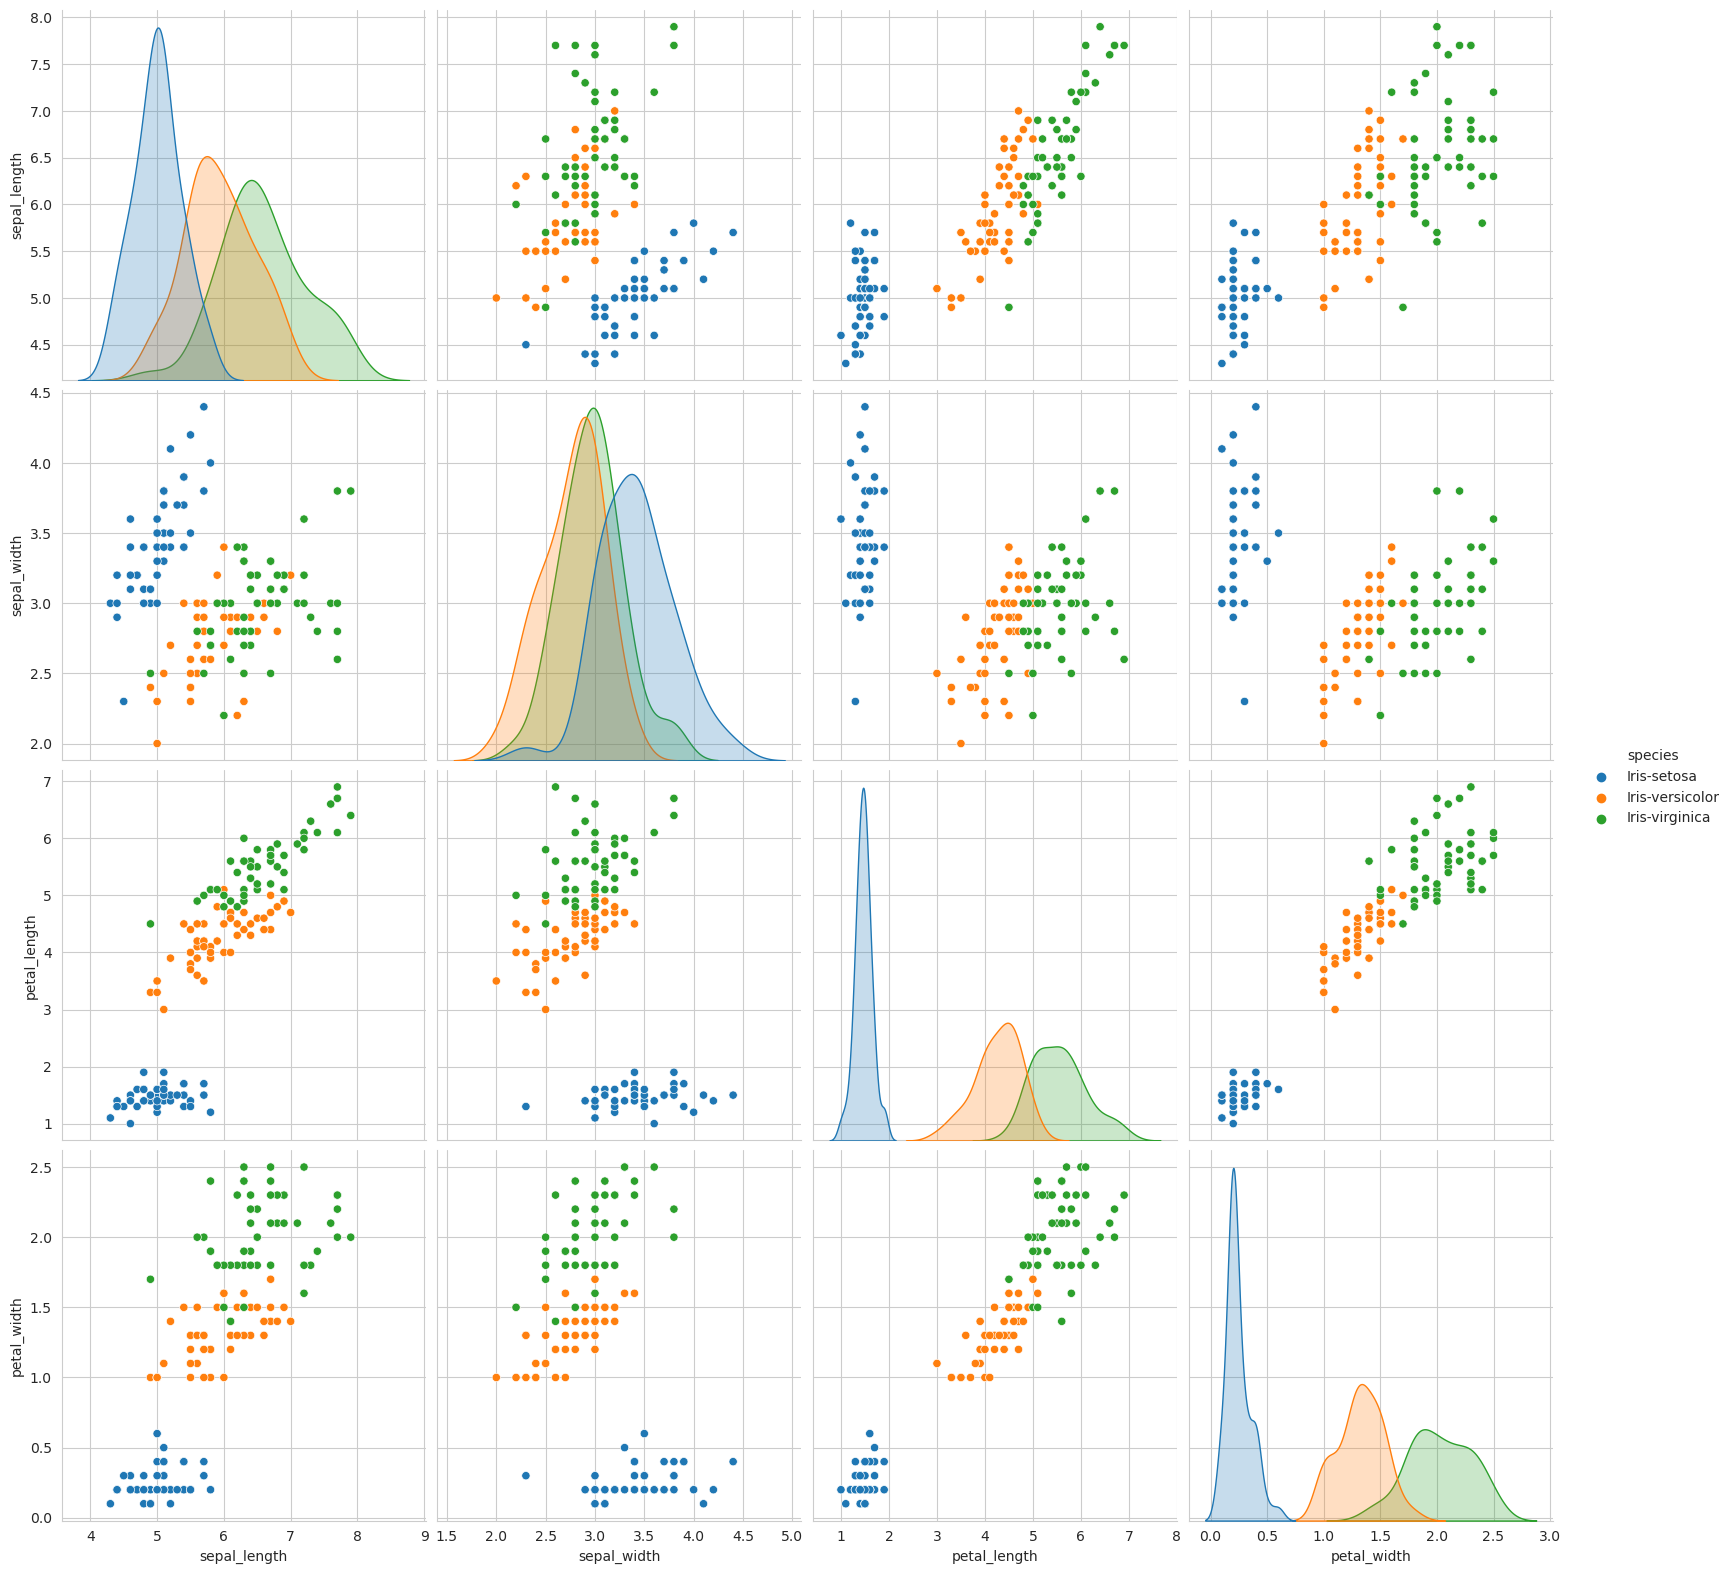

In [15]:
sns.set_style("whitegrid")
sns.pairplot(iris_data,hue="species",size=4)
plt.show()

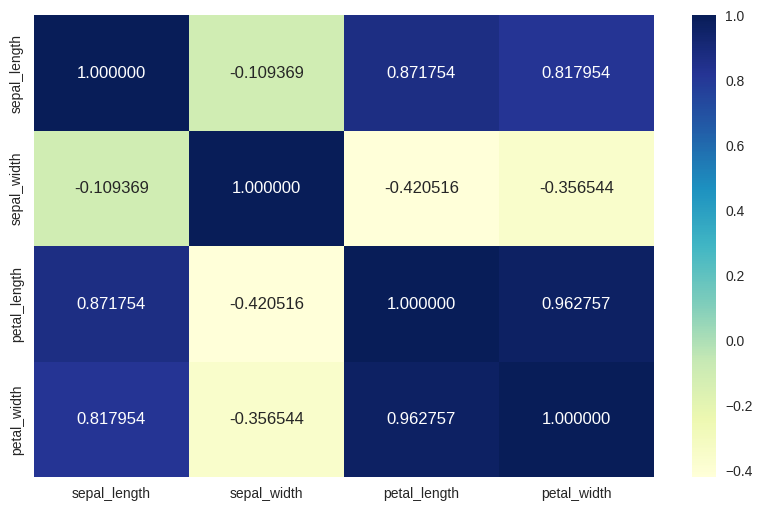

In [38]:


plt.figure(figsize=(10,6)) 
sns.heatmap(iris_data.corr(),annot=True,fmt="f",cmap="YlGnBu")
plt.show()



In [16]:
from sklearn.cluster import KMeans

In [17]:
wcss=[]
for i in range(1,11):
    kmean=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmean.fit(x)
    wcss.append(kmean.inertia_)
wcss

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.31787321428571,
 46.56163015873017,
 38.93096304967175,
 34.19068792479663,
 30.06387443273314,
 27.842356060606065,
 26.04820224804436]

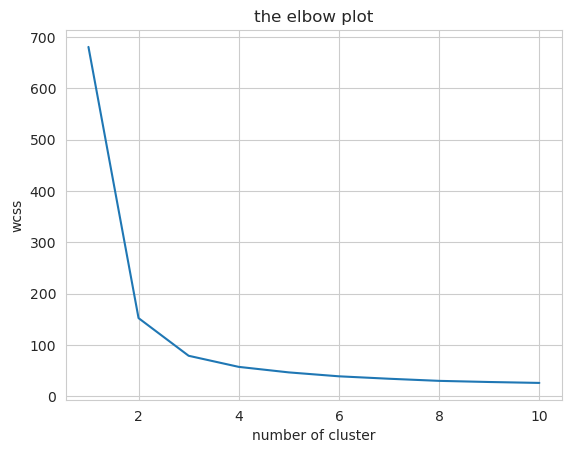

In [18]:
plt.plot(range(1,11),wcss)
plt.title('the elbow plot')
plt.xlabel('number of cluster')
plt.ylabel('wcss')
plt.show()

In [19]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [20]:
from yellowbrick.cluster import KElbowVisualizer

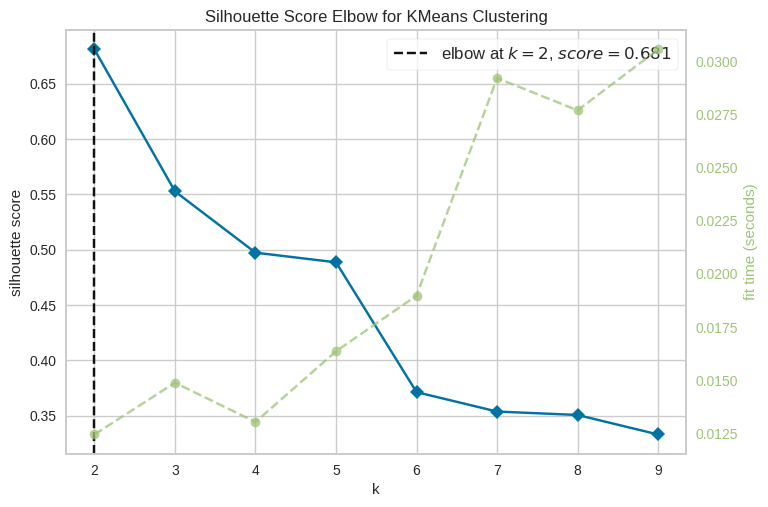

In [21]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(x)
visualizer.show()
plt.show()


In [22]:
kmeans = KMeans(n_clusters =3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
x = iris_data.iloc[:, [0,1,2,3]].values
y_kmeans = kmeans.fit_predict(x)
y_kmeans



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [23]:
df_kmean = iris_data.copy()

In [24]:
label  = pd.DataFrame(y_kmeans, columns= ['label'])
label.head()


,label
0,1
1,1
2,1
3,1
4,1


In [25]:
df_kmean = pd.concat([df_kmean, label], axis =1)
df_kmean.head()
#df_kmean.drop('label',axis=1)

,sepal_length,sepal_width,petal_length,petal_width,species,label
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


In [29]:
df_kmean.head(100)

,sepal_length,sepal_width,petal_length,petal_width,species,label
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor,0
96,5.7,2.9,4.2,1.3,Iris-versicolor,0
97,6.2,2.9,4.3,1.3,Iris-versicolor,0
98,5.1,2.5,3.0,1.1,Iris-versicolor,0


In [26]:
df_kmean.label.value_counts()

0    62
1    50
2    38
Name: label, dtype: int64

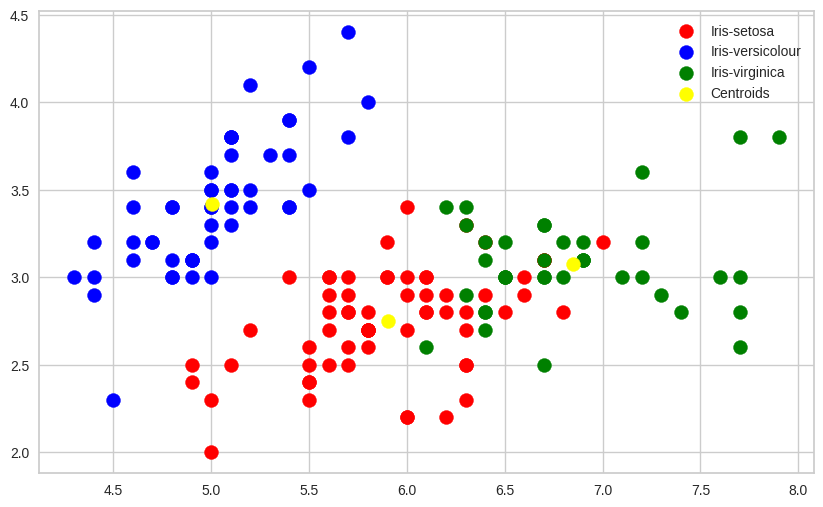

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')


# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()